In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%cd ..

/home/ds/DataScience/home/ademyanchuk/Projects/ulmfit-multilingual


In [3]:
from fastai import *
from fastai.text import *

In [4]:
from ulmfit.pretrain_lm import *

In [5]:
exp = LMHyperParams(dataset_path='data/wiki/ru-100/', qrnn=False, tokenizer='v',
                    lang='ru', name='russian')

Max vocab: 60000
Cache dir: data/wiki/ru-100/models/v60k
Model dir: data/wiki/ru-100/models/v60k/lstm_russian.m


In [6]:
data_lm = exp.load_wiki_data(bs=20)

Size of vocabulary: 60007
First 20 words in vocab: ['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', ',', 'в', '.', 'и', '(', ')', 'на', '—', '»', '«', 'с', 'года']


In [7]:
data_lm.train_dl.batch_size

20

In [8]:
len(data_lm.train_dl)

66131

In [9]:
data_lm.show_batch()

idx,text
0,"xxbos \n= Теория Маркуса xxunk xxunk конце 50-х — начале 60-х годов XX века Р. Маркус предложил теорию , xxunk перенос электрона в xxunk xxunk в рамках xxunk приближения . Затем теория Маркуса , известная также как теория переходного состояния ( ) , xxunk на xxunk процессы xxunk вклад Маркуса заключался в xxunk влияния растворителя на перенос электрона . Он рассмотрел движение электрона по поверхности потенциальной энергии , координатами которой"
1,"его подготовку к xxunk в марафоне « Париж — Дакар » 1978 года . Две xxunk xxunk . xxunk « xxunk » оказались в числе трети xxunk участников , благополучно xxunk в этом соревновании . В 1981 году французская команда , выступавшая на этих автомобилях , сумела занять третье место , а в сезоне 1982 года — второе . В дальнейшем французским xxunk неоднократно удавалось занимать призовые места на xxunk"
2,", никогда не живших даже близко к Москве .\n\nПоявление и становление Москвы .\nРека Москва представляла собой xxunk звено между важными торговыми путями . Её верхнее течение почти xxunk к северной части xxunk торгового пути , xxunk далее через озеро xxunk и Великий Новгород ( либо через Западную Двину и Полоцк ) в Балтику . С верхней Волги вниз по Днепру через Смоленск и Киев можно было попасть в Чёрное море"
3,"среднее учтено в xxunk , которая обязательно присутствует в числе факторов , а возможная xxunk xxunk учитывается за счет соответствующего xxunk всех коэффициентов b .\n\nКак и в общем случае модели xxunk выбора в основе модели лежит предположение о наличии некоторой скрытой ( не xxunk ) переменной formula _ 12 , в зависимости от значений которой xxunk переменная formula _ 2 принимает значение formula _ 4 или formula _ 3 xxunk"
4,"xxunk на территории современных Европы , Северной Америки и Центральной Азии , в xxunk периоде в Австралии и Антарктиде . В России обнаружены в верхнем xxunk Амурской области .\n\nСистематика .\nКлассификация .\nПо данным сайта xxunk , на сентябрь 2017 года в xxunk включают следующие таксоны xxunk больше десятка родов включают в xxunk в статусе "" xxunk xxunk "" : xxunk xxunk представлена Ричардом xxunk и его коллегами в 2011 году :\n\n\n"


In [10]:
learn = exp.create_lm_learner(data_lm=data_lm)

Training args:  {'tie_weights': True, 'clip': 0.12, 'bptt': 70, 'pretrained_fnames': None, 'pretrained_model': None} dps:  [0.25 0.1  0.2  0.02 0.15]


In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


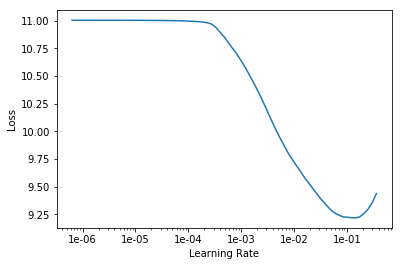

In [15]:
learn.recorder.plot(skip_end=15)

In [13]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(10, 5e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.790559,4.490133,0.323604
2,4.864450,4.500994,0.319487
3,4.748384,4.529564,0.316132
4,4.849702,4.508623,0.316207
5,4.770301,4.496254,0.319752
6,4.720208,4.406010,0.327390
7,4.711561,4.319860,0.332331
8,4.501110,4.232864,0.340277
9,4.592453,4.178996,0.348836
10,4.533059,4.158452,0.351359


In [17]:
learn.save("lm_10i")

In [18]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.472561,4.172580,0.347433
2,4.535592,4.231564,0.345258
3,4.665092,4.226340,0.340519
4,4.571750,4.222316,0.344372
5,4.577867,4.177708,0.344268
6,4.619215,4.155945,0.351058
7,4.584020,4.134072,0.352429
8,4.325761,4.128910,0.353810
9,4.486596,4.115236,0.356344
10,4.508442,4.109302,0.357113


In [19]:
learn.save("lm_20i")